In [15]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Download the data

In [3]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("..","data", "raw")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


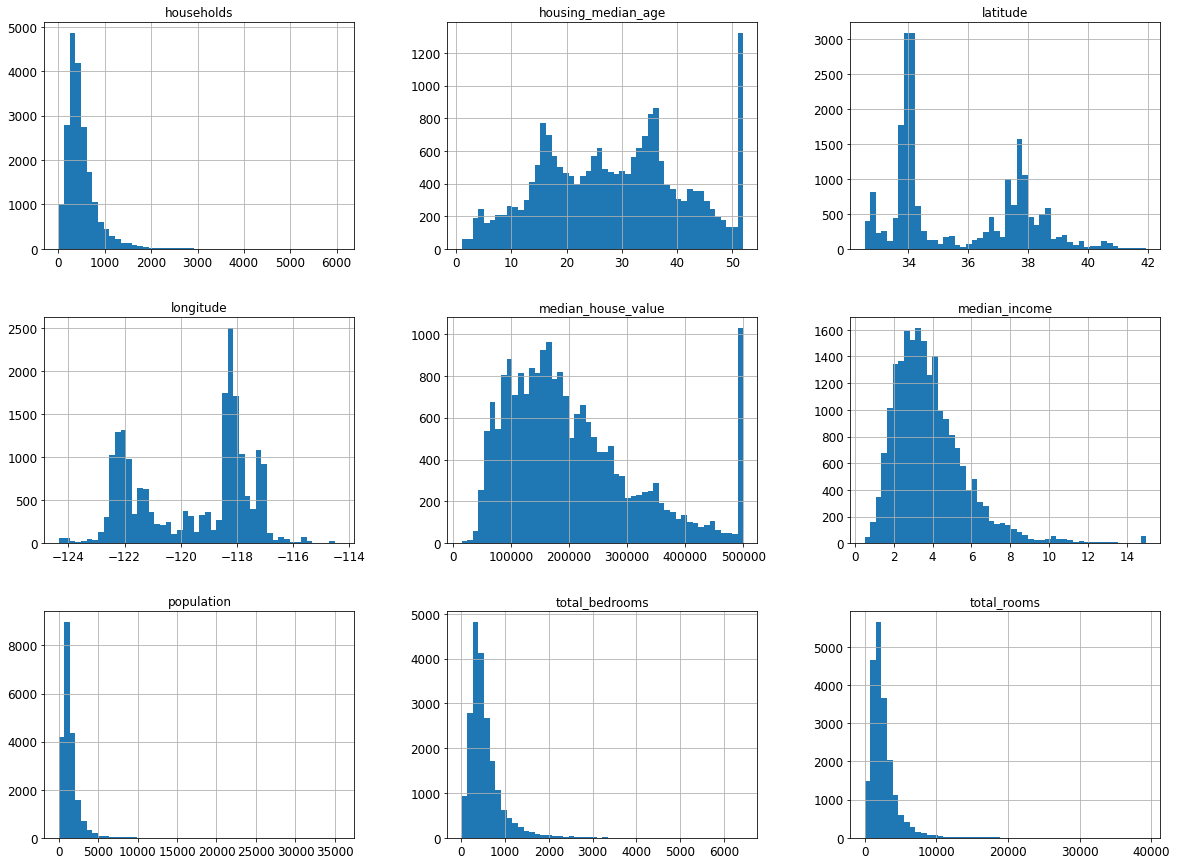

In [16]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Test Set

In [17]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [18]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [19]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [20]:
len(test_set)

4128

In [21]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [23]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [24]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [25]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [26]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [27]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [29]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


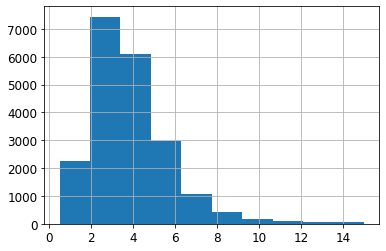

In [30]:
housing["median_income"].hist()
plt.show()

In [33]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [34]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

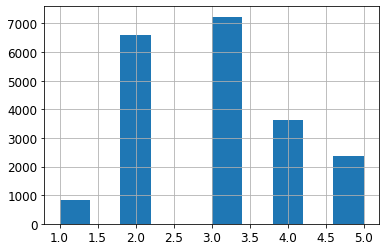

In [35]:
housing["income_cat"].hist()
plt.show()

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [37]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [38]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [39]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [40]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [41]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [42]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

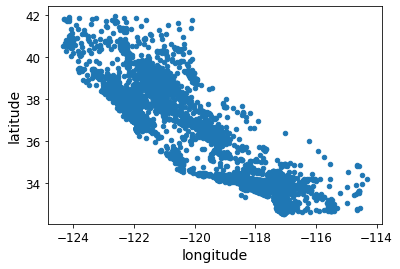

In [45]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

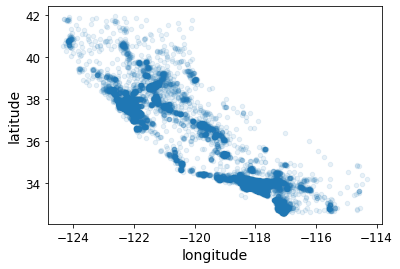

In [46]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

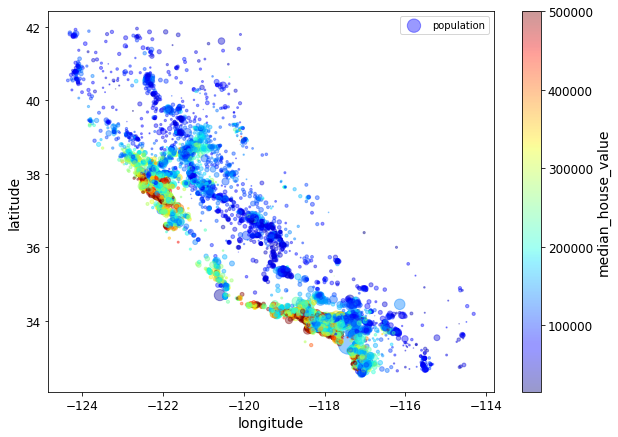

In [49]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

In [56]:
# Download the California image
images_path = os.path.join('.', "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
filename = "california.png"
print("Downloading", filename)
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/california.png'
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f3a70bbdc40>)

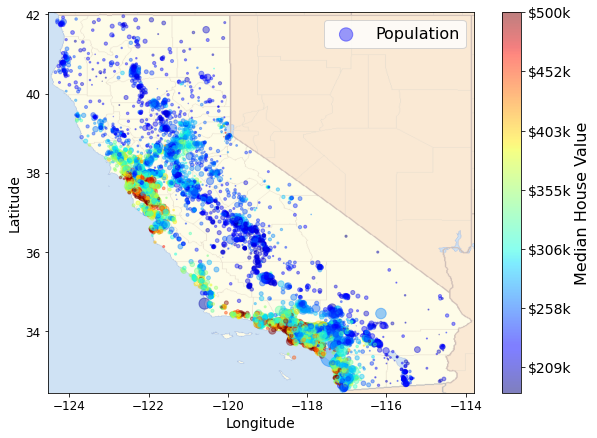

In [57]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7), 
                s=housing['population']/100, label="Population", c="median_house_value",
                cmap=plt.get_cmap("jet"), colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

## Looking for Correlations

In [58]:
corr_matrix = housing.corr()

In [59]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

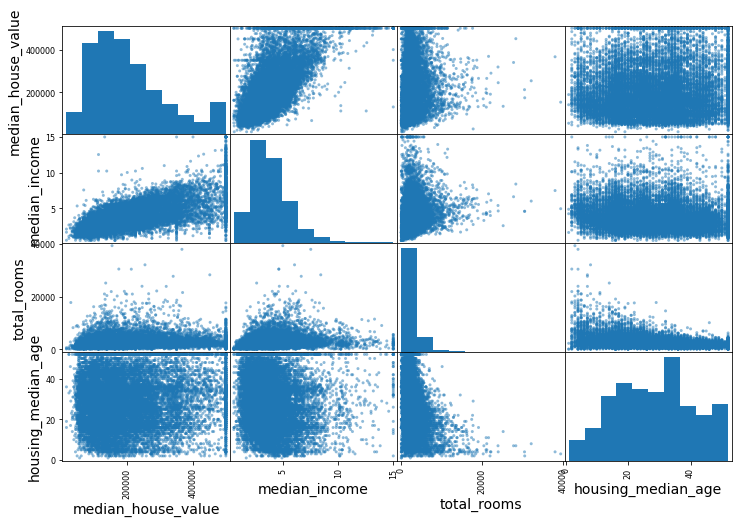

In [60]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

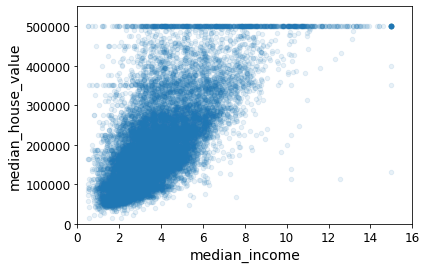

In [61]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

## Experimenting with Attribute Combinations

In [62]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [63]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

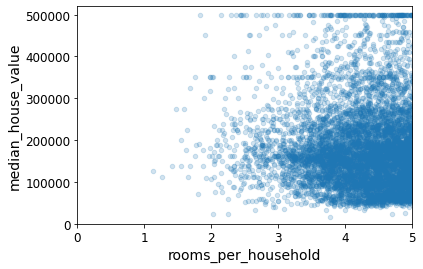

In [64]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [65]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Prepare the Data for Machine Learning Algorithms

In [66]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

In [67]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [68]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [69]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [70]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [71]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [72]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [73]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [74]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [75]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [76]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [77]:
X = imputer.transform(housing_num)

In [78]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [79]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [80]:
imputer.strategy

'median'

In [81]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [82]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## Handling Text and Categorical Attributes

In [83]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [84]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [85]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [86]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [87]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [88]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [89]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [91]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [92]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29,3873,797,2237,706,2.1736,INLAND,5.48584,3.16856
15502,-117.23,33.09,7,5320,855,2015,768,6.3373,NEAR OCEAN,6.92708,2.6237
2908,-119.04,35.37,44,1618,310,667,300,2.875,INLAND,5.39333,2.22333
14053,-117.13,32.75,24,1877,519,898,483,2.2264,NEAR OCEAN,3.88613,1.85921
20496,-118.7,34.28,27,3536,646,1837,580,4.4964,<1H OCEAN,6.09655,3.16724


## Transformation Pipelines

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [94]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [95]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [96]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [97]:
housing_prepared.shape

(16512, 16)

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [99]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [100]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [101]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [102]:
np.allclose(housing_prepared, old_housing_prepared)

True

## Select and Train a Model

### Training and Evaluating on the Training Set

In [103]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [104]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [105]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [106]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [107]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [108]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915802

In [109]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [110]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [111]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [112]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [113]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666


In [114]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [115]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [116]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [117]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [118]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

## Fine-Tune Your Model

### Grid Search

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [120]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [121]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [123]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057508,0.009626,0.004675,0.000630,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.196671,0.035717,0.012167,0.004078,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.498411,0.023008,0.025645,0.001120,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.081187,0.000921,0.003521,0.000064,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.302100,0.030918,0.011606,0.002418,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.913592,0.063605,0.032658,0.006454,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.111094,0.005627,0.003918,0.000531,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.418639,0.042400,0.011151,0.002206,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,1.164820,0.053207,0.025906,0.001106,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.143060,0.001752,0.003840,0.000451,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


## Randomized Search

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3a696f91f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3a699a53d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [125]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [126]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [127]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

## Evaluate Your System on the Test Set

In [128]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [129]:
final_rmse

47873.26095812988

In [130]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

In [131]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45893.360828285535, 49774.46796717361)

In [132]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45893.9540110131, 49773.921030650374)

# Extra material

## A full pipeline with both preparation and prediction

In [133]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

## Model persistence using joblib

In [134]:
my_model = full_pipeline_with_predictor

In [135]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributions for `RandomizedSearchCV`

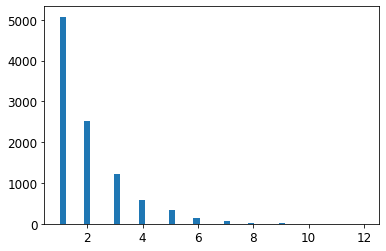

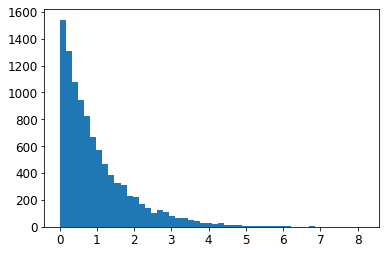

In [136]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# Exercise solutions

## 1. Support vector machine

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [137]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   7.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.4s
[CV] END .............................C=100.0, kernel=linear; total time=   8.9s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [138]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70286.6183616961

In [139]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

## 2. RadomizedSearchCV

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   7.2s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.6s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=20.9min
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   7.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   7.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.4s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3a6946c2e0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3a758b5a30>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [141]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009256622

In [142]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

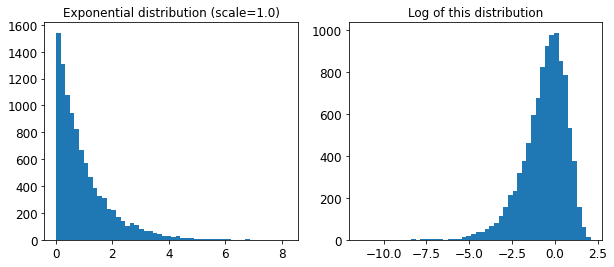

In [143]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

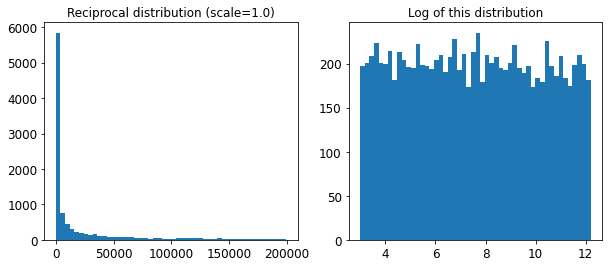

In [144]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

## 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [145]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [146]:
k = 5

In [147]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [148]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

Let's double check that these are indeed the top k features:

In [149]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude')]

In [150]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [151]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Let's look at the features of the first 3 instances:

In [152]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

Now let's double check that these are indeed the top k features:

In [153]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [154]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [155]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [156]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 83384.49158095 299407.90439234  92272.03345144 150173.16199041]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


## 5.

Question: Automatically explore some preparation options using `GridSearchCV`.

In [157]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   8.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   8.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   8.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   8.8s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   6.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.7s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   7.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.5s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   6.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   9.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   8.8s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   6.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   9.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   9.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   8.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   8.8s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   6.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   8.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   8.8s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   9.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   9.1s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   7.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.0s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.2s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   7.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   9.0s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   9.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   9.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   8.9s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   7.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   8.9s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   8.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   9.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  11.5s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  11.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  11.0s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  10.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  12.0s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   9.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.0s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  12.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  11.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  11.8s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   9.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  11.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  10.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  11.1s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  10.8s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.4s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  11.2s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.5s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.8s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   8.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  10.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  11.2s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  12.3s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  10.3s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   8.3s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  10.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  10.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  10.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  10.9s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   8.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  11.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  11.0s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   8.4s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  11.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  11.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.9s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   8.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  11.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  11.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.6s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   8.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  10.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  10.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   9.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  10.1s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   7.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   9.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  10.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   9.5s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   7.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   9.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  10.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  10.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   9.8s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  10.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  11.0s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  11.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  11.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  11.2s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   9.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  10.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  11.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  12.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  14.3s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  11.0s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  13.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  12.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  13.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  12.3s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  12.1s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  14.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  13.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  13.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  14.1s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  12.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  15.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  14.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  13.4s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  14.7s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  10.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  15.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  13.5s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  13.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  14.4s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  15.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  16.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  13.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  16.0s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  22.0s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  15.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  19.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  17.4s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  17.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  15.8s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  14.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  17.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  17.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  17.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  14.9s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  14.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  18.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  17.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  19.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  16.6s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  14.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  16.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  16.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  20.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  18.3s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  17.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  18.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  19.5s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  19.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  20.2s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  16.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  21.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  21.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  20.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  19.9s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  19.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  21.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  19.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  17.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  22.0s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  23.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  21.8s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  18.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  18.1s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  20.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  21.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  17.8s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  18.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  20.0s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  17.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  22.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  26.6s


/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  18.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  16.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  19.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  17.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  17.6s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  18.4s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  20.6s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  19.7s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  20.9s
[CV] 

/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/saurabhzinjad/miniconda3/envs/testcase-dev/lib/python3.8/sit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
       

In [158]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}